**Importing Required Libraries**

In [ ]:
import pandas as pd # to read data set
import numpy as np # to perform numeric operation
import matplotlib.pyplot as plt # for Visualise

**Accesing DataSet from Google Drive, So using Drive Mount**

In [ ]:
from google.colab import drive # Accessing DataSet from Google Drive
drive.mount('/content/gdrive') # Drive Mount Authorization

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Reading DataSet CSV File from Google Drive**

In [ ]:
df_bst=pd.read_csv('/content/gdrive/My Drive/Co_data.csv',encoding='latin1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Displaying Dataset Head**

In [ ]:
df_bst.head()

,member_id,loan_amnt,terms,batch_ID,Rate_of_intrst,grade,sub_grade,Emp_designation,Experience,home_ownership,annual_inc,verification_status,purpose,State,debt_income_ratio,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,numb_credit,pub_rec,total revol_bal,total_credits,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,58189336,14350,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,debt_consolidation,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0
1,70011223,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,home_improvement,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0
2,70255675,10000,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,debt_consolidation,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0
3,1893936,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,debt_consolidation,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0
4,7652106,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,credit_card,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0


**Displaying Number of Rows & Columns**

In [ ]:
df_bst.shape

(887379, 36)

**Dataset Information like DataTypes, Null Values, Counts**

In [ ]:
df_bst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    887379 non-null  int64  
 1   loan_amnt                    887379 non-null  int64  
 2   terms                        887379 non-null  object 
 3   batch_ID                     756631 non-null  object 
 4   Rate_of_intrst               887379 non-null  float64
 5   grade                        887379 non-null  object 
 6   sub_grade                    887379 non-null  object 
 7   Emp_designation              835917 non-null  object 
 8   Experience                   842554 non-null  object 
 9   home_ownership               887379 non-null  object 
 10  annual_inc                   887375 non-null  float64
 11  verification_status          887379 non-null  object 
 12  purpose                      887379 non-null  object 
 13 

**Displaying Column Names**

In [ ]:
df_bst.columns

Index(['member_id ', 'loan_amnt ', 'terms', 'batch_ID ', 'Rate_of_intrst',
       'grade', 'sub_grade', 'Emp_designation', 'Experience', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'State',
       'debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'numb_credit',
       'pub_rec', 'total revol_bal', 'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_colle_amt', 'tot_curr_bal'],
      dtype='object')

**Deleting Unnecessary Columns**

In [ ]:
df_bst = df_bst.drop(columns=['member_id ','batch_ID ','mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog','verification_status_joint'],axis=1)

In [ ]:
df_bst.columns

Index(['loan_amnt ', 'terms', 'Rate_of_intrst', 'grade', 'sub_grade',
       'Emp_designation', 'Experience', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'State', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 'pub_rec',
       'total revol_bal', 'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'last_week_pay', 'acc_now_delinq', 'tot_colle_amt',
       'tot_curr_bal'],
      dtype='object')

**Separating Categorical Variables**

In [ ]:
catgor1 = [colmn for colmn in df_bst.columns if df_bst[colmn].dtypes == 'O']
catgor1

['terms',
 'grade',
 'sub_grade',
 'Emp_designation',
 'Experience',
 'home_ownership',
 'verification_status',
 'purpose',
 'State',
 'initial_list_status',
 'application_type',
 'last_week_pay']

**Deleting Categorical Variables**

In [ ]:
df_bst = df_bst.drop(columns=catgor1,axis=1)

**Displaying No. of Rows & Columns**

In [ ]:
df_bst.shape

(887379, 18)

In [ ]:
df_bst.columns

Index(['loan_amnt ', 'Rate_of_intrst', 'annual_inc', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 'pub_rec',
       'total revol_bal', 'total_credits', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_colle_amt',
       'tot_curr_bal'],
      dtype='object')

**Filling NA values wrt Mean**

In [ ]:
df_bst.collections_12_mths_ex_med = df_bst.collections_12_mths_ex_med.fillna(df_bst.collections_12_mths_ex_med.mean())
#df_bst.mths_since_last_major_derog = df_bst.mths_since_last_major_derog.fillna(df_bst.mths_since_last_major_derog.mean())
#df_bst.Experience = df_bst.Experience.fillna(df_bst.Experience.mean())
df_bst.delinq_2yrs = df_bst.delinq_2yrs.fillna(df_bst.delinq_2yrs.mean())
df_bst.inq_last_6mths = df_bst.inq_last_6mths.fillna(df_bst.inq_last_6mths.mean())
#df_bst.mths_since_last_delinq = df_bst.mths_since_last_delinq.fillna(df_bst.mths_since_last_delinq.mean())
#df_bst.mths_since_last_record = df_bst.mths_since_last_record.fillna(df_bst.mths_since_last_record.mean())
df_bst.numb_credit = df_bst.numb_credit.fillna(df_bst.numb_credit.mean())
df_bst.total_credits = df_bst.total_credits.fillna(df_bst.total_credits.mean())
df_bst.tot_colle_amt = df_bst.tot_colle_amt.fillna(df_bst.tot_colle_amt.mean())
df_bst.tot_curr_bal = df_bst.tot_curr_bal.fillna(df_bst.tot_curr_bal.mean())
df_bst.pub_rec  = df_bst.pub_rec.fillna(df_bst.pub_rec.mean())
df_bst.acc_now_delinq  = df_bst.acc_now_delinq.fillna(df_bst.acc_now_delinq.mean())
#df_bst.last_week_pay  = df_bst.last_week_pay.fillna(df_bst.last_week_pay.mean())
df_bst.annual_inc = df_bst.annual_inc.fillna(df_bst.annual_inc.mean())

**Removing NA values If any exist**

In [ ]:
df_bst.dropna(how='any',axis=0)

,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total revol_bal,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
0,14350,19.19,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,28.0,1173.84,0.0,0.0,0.0,0.0,0.0,0.00000,28699.000000
1,4800,10.99,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,13.0,83.95,0.0,0.0,0.0,0.0,0.0,0.00000,9974.000000
2,10000,7.26,45000.0,18.42,0.0,0.0,5.0,0.0,10877.0,19.0,56.47,0.0,0.0,0.0,0.0,0.0,65.00000,38295.000000
3,15000,19.72,105000.0,14.97,0.0,2.0,10.0,0.0,13712.0,21.0,4858.62,0.0,0.0,0.0,0.0,0.0,0.00000,55564.000000
4,16000,10.64,52000.0,20.16,0.0,0.0,11.0,0.0,35835.0,27.0,2296.41,0.0,0.0,0.0,0.0,0.0,0.00000,47159.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,15000,6.49,97250.0,12.46,0.0,0.0,12.0,0.0,12201.0,24.0,1180.32,0.0,0.0,0.0,0.0,0.0,0.00000,143920.000000
887375,35000,25.89,180000.0,11.78,2.0,2.0,21.0,0.0,52584.0,33.0,6508.41,0.0,0.0,0.0,0.0,0.0,0.00000,772713.000000
887376,14000,17.51,56000.0,16.44,0.0,3.0,11.0,1.0,10948.0,25.0,3456.24,0.0,0.0,0.0,0.0,0.0,225.70261,139458.189336
887377,20000,7.26,100000.0,15.00,0.0,0.0,7.0,0.0,33599.0,11.0,766.84,0.0,0.0,0.0,0.0,0.0,0.00000,291998.000000


**Checking Datatype of each columns**

In [ ]:
df_bst.dtypes

loan_amnt                       int64
Rate_of_intrst                float64
annual_inc                    float64
debt_income_ratio             float64
delinq_2yrs                   float64
inq_last_6mths                float64
numb_credit                   float64
pub_rec                       float64
total revol_bal               float64
total_credits                 float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
tot_colle_amt                 float64
tot_curr_bal                  float64
dtype: object

**Describe Function will give us statistical score like Mean, Standard Deviation, Quartile, half & Max**

In [ ]:
df_bst.describe()

,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total revol_bal,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal
count,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.00000,887379.000000,8.873790e+05,8.873790e+05
mean,14755.264605,13.246740,7.502759e+04,18.157039,0.314442,0.694623,11.548469,0.195307,1.692079e+04,25.268026,1754.804327,0.396692,45.919243,4.880757,0.01438,0.004991,2.257026e+02,1.394582e+05
std,8435.455601,4.381867,6.469815e+04,17.190626,0.862230,0.998431,5.317226,0.582081,2.242679e+04,11.840368,2095.356099,4.087825,409.693874,63.125281,0.13418,0.077624,9.894641e+03,1.475363e+05
min,500.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00
25%,8000.000000,9.990000,4.500000e+04,11.910000,0.000000,0.000000,8.000000,0.000000,6.443000e+03,17.000000,441.460000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,3.224600e+04
50%,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,11.000000,0.000000,1.187500e+04,24.000000,1073.280000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,1.000890e+05
75%,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,14.000000,0.000000,2.082900e+04,32.000000,2238.265000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,1.957940e+05
max,35000.000000,28.990000,9.500000e+06,9999.000000,39.000000,33.000000,90.000000,86.000000,2.904836e+06,169.000000,24205.620000,358.680000,33520.270000,7002.190000,20.00000,14.000000,9.152545e+06,8.000078e+06


**Checking Correlation of all Feature Variables with Target Variable**

In [ ]:
df_bst[df_bst.columns[0:]].corr()['total revol_bal'][:]

loan_amnt                     0.333580
Rate_of_intrst               -0.035708
annual_inc                    0.295783
debt_income_ratio             0.067277
delinq_2yrs                  -0.032486
inq_last_6mths               -0.017556
numb_credit                   0.224540
pub_rec                      -0.100609
total revol_bal               1.000000
total_credits                 0.189103
total_rec_int                 0.137380
total_rec_late_fee            0.002774
recoveries                    0.010828
collection_recovery_fee       0.008151
collections_12_mths_ex_med   -0.022850
acc_now_delinq               -0.000855
tot_colle_amt                -0.006036
tot_curr_bal                  0.429024
Name: total revol_bal, dtype: float64

**Checking Correlation of all columns Seperately**

In [ ]:
correlation_df = df_bst.corr()
print(correlation_df)

                            loan_amnt   ...  tot_curr_bal
loan_amnt                     1.000000  ...      0.315930
Rate_of_intrst                0.145023  ...     -0.088222
annual_inc                    0.332697  ...      0.405282
debt_income_ratio             0.020675  ...     -0.007218
delinq_2yrs                  -0.000159  ...      0.063706
inq_last_6mths               -0.034167  ...      0.031633
numb_credit                   0.198900  ...      0.235886
pub_rec                      -0.081175  ...     -0.075163
total revol_bal               0.333580  ...      0.429024
total_credits                 0.222633  ...      0.298828
total_rec_int                 0.533916  ...      0.121613
total_rec_late_fee            0.031395  ...      0.009866
recoveries                    0.073150  ...      0.003686
collection_recovery_fee       0.052205  ...      0.004628
collections_12_mths_ex_med   -0.016648  ...     -0.010978
acc_now_delinq                0.003947  ...      0.023382
tot_colle_amt 

**Type casting Loan Amount to float type**

In [ ]:
df_bst['loan_amnt '] = df_bst['loan_amnt '].astype(float)

In [ ]:
df_bst.dtypes

loan_amnt                     float64
Rate_of_intrst                float64
annual_inc                    float64
debt_income_ratio             float64
delinq_2yrs                   float64
inq_last_6mths                float64
numb_credit                   float64
pub_rec                       float64
total revol_bal               float64
total_credits                 float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
tot_colle_amt                 float64
tot_curr_bal                  float64
dtype: object

**Separating Feature & Categorical Variables**

In [ ]:
X_bst = df_bst[['loan_amnt ', 'Rate_of_intrst', 'annual_inc', 'debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 
       'pub_rec', 'total_credits', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 
       'acc_now_delinq', 'tot_colle_amt','tot_curr_bal']]
Y_bst = df_bst[['total revol_bal']]

**Performing Standard Scaler Operation to Dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler()
Y_std = StandardScaler()
X_bst = X_std.fit_transform(X_bst)
Y_bst = Y_std.fit_transform(Y_bst)

**Applying Normlization to whole dataset**

In [ ]:
df_bst=(df_bst-df_bst.min())/(df_bst.max()-df_bst.min())

In [ ]:
df_bst.columns

Index(['loan_amnt ', 'Rate_of_intrst', 'annual_inc', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 'pub_rec',
       'total revol_bal', 'total_credits', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_colle_amt',
       'tot_curr_bal'],
      dtype='object')

**Importing Required packages for XGBoosting Model**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

**Performing Matrix Convertion for Target & Feature Variables**

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_bst,label=Y_bst)

**Splitting whole Dataset into Train & Test**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_bst, Y_bst, test_size=0.3, random_state=42)
xtrain.shape, xtest.shape

((621165, 17), (266214, 17))

**Applying XGBRegressor for Model Building**

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, 
                          alpha = 10, n_estimators = 10)

**Applying XGBRegressor to Model**

In [ ]:
xg_reg.fit(xtrain,ytrain)
preds = xg_reg.predict(xtest)

[12:17:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Checking for RMSE [Root Mean Squared Error] on Test Data**

In [ ]:
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.886421


In [ ]:
Y_test_bst = pd.DataFrame(data=Y_std.inverse_transform(ytest), columns=['total revol_bal'])

In [ ]:
X_tst_bst = xtest

In [ ]:
pred_bst = Y_std.inverse_transform(xg_reg.predict(X_tst_bst))

In [ ]:
Y_test_bst.insert(loc=1,column='Predicted_Values',value=pred_bst)

**Printing Actual & Predicted Values of XGBoost Regressor**

In [ ]:
Y_test_bst

,total revol_bal,Predicted_Values
0,7527.0,19900.054688
1,17678.0,24309.255859
2,8377.0,19539.537109
3,7555.0,20489.533203
4,170004.0,48521.718750
...,...,...
266209,19125.0,19100.835938
266210,17551.0,22886.326172
266211,28027.0,21961.437500
266212,38473.0,29608.214844


**Printing Predicted Values at last columns in Original Dataset**

In [ ]:
df_pred = pd.merge(df_bst,Y_test_bst[['Predicted_Values']],how = 'left',left_index = True, right_index = True)

**Normalizing the predicted Values**

In [ ]:
df_pred['Predicted_Values']=(df_pred['Predicted_Values']-df_pred['Predicted_Values'].min())/(df_pred['Predicted_Values'].max()-df_pred['Predicted_Values'].min())

**Last Column is Predicted_Values Column**

In [ ]:
df_pred.head()

,loan_amnt,Rate_of_intrst,annual_inc,debt_income_ratio,delinq_2yrs,inq_last_6mths,numb_credit,pub_rec,total revol_bal,total_credits,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_colle_amt,tot_curr_bal,Predicted_Values
0,0.401449,0.585974,0.003021,0.003388,0.0,0.030303,0.155556,0.011628,0.007751,0.160714,0.048495,0.0,0.0,0.0,0.0,0.0,0.000000,0.003587,0.019388
1,0.124638,0.239544,0.006842,0.000364,0.0,0.030303,0.066667,0.000000,0.002625,0.071429,0.003468,0.0,0.0,0.0,0.0,0.0,0.000000,0.001247,0.030007
2,0.275362,0.081960,0.004737,0.001842,0.0,0.000000,0.055556,0.000000,0.003744,0.107143,0.002333,0.0,0.0,0.0,0.0,0.0,0.000007,0.004787,0.018519
3,0.420290,0.608365,0.011053,0.001497,0.0,0.060606,0.111111,0.000000,0.004720,0.119048,0.200723,0.0,0.0,0.0,0.0,0.0,0.000000,0.006945,0.020807
4,0.449275,0.224757,0.005474,0.002016,0.0,0.000000,0.122222,0.000000,0.012336,0.154762,0.094871,0.0,0.0,0.0,0.0,0.0,0.000000,0.005895,0.088320


**K-Fold Cross Validation**

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=100)

[12:23:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Checking Test RMSE Mean Values**

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.807588
Name: test-rmse-mean, dtype: float64


**Checking Feature Importance using Plot**

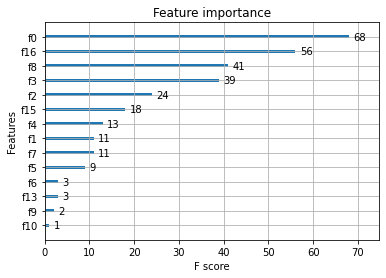

In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()